In [122]:
import numpy as np # Pour le calcul dex tableaux
import pandas as pd # pour la manipulation des donnees
import matplotlib.pyplot as plt # La visualisation des donnnees
import seaborn as sns # La visualisation des donnnees

# Pour la division de donnees
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Pour la creation des Algorithmes Classiques
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Les Metriques
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Pour les modeles de reseaux de neurons
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical


from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('dermatology_database_1.csv', na_values='?')

In [3]:
data.rename(columns={"class": "classes"}, inplace=True)

In [4]:
all_numeric = data.apply(lambda s: pd.to_numeric(s, errors='coerce').notna().all())
print(all_numeric)

erythema                                True
scaling                                 True
definite_borders                        True
itching                                 True
koebner_phenomenon                      True
polygonal_papules                       True
follicular_papules                      True
oral_mucosal_involvement                True
knee_and_elbow_involvement              True
scalp_involvement                       True
family_history                          True
melanin_incontinence                    True
eosinophils_infiltrate                  True
PNL_infiltrate                          True
fibrosis_papillary_dermis               True
exocytosis                              True
acanthosis                              True
hyperkeratosis                          True
parakeratosis                           True
clubbing_rete_ridges                    True
elongation_rete_ridges                  True
thinning_suprapapillary_epidermis       True
spongiform

In [5]:
 #1. Identifier les lignes où la conversion échoue
non_numeric_ages = data[pd.to_numeric(data["age"], errors="coerce").isna()]

# 2. Afficher les valeurs problématiques
print(non_numeric_ages["age"])

33    NaN
34    NaN
35    NaN
36    NaN
262   NaN
263   NaN
264   NaN
265   NaN
Name: age, dtype: float64


In [6]:
data["age"].fillna(data["age"].mean(), inplace=True)

In [7]:
data[pd.to_numeric(data["age"], errors="coerce").isna()]

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,classes


In [8]:
data.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,classes
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55.0,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8.0,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26.0,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40.0,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45.0,3


In [9]:
data.isna().sum()

erythema                               0
scaling                                0
definite_borders                       0
itching                                0
koebner_phenomenon                     0
polygonal_papules                      0
follicular_papules                     0
oral_mucosal_involvement               0
knee_and_elbow_involvement             0
scalp_involvement                      0
family_history                         0
melanin_incontinence                   0
eosinophils_infiltrate                 0
PNL_infiltrate                         0
fibrosis_papillary_dermis              0
exocytosis                             0
acanthosis                             0
hyperkeratosis                         0
parakeratosis                          0
clubbing_rete_ridges                   0
elongation_rete_ridges                 0
thinning_suprapapillary_epidermis      0
spongiform_pustule                     0
munro_microabcess                      0
focal_hypergranu

<Axes: >

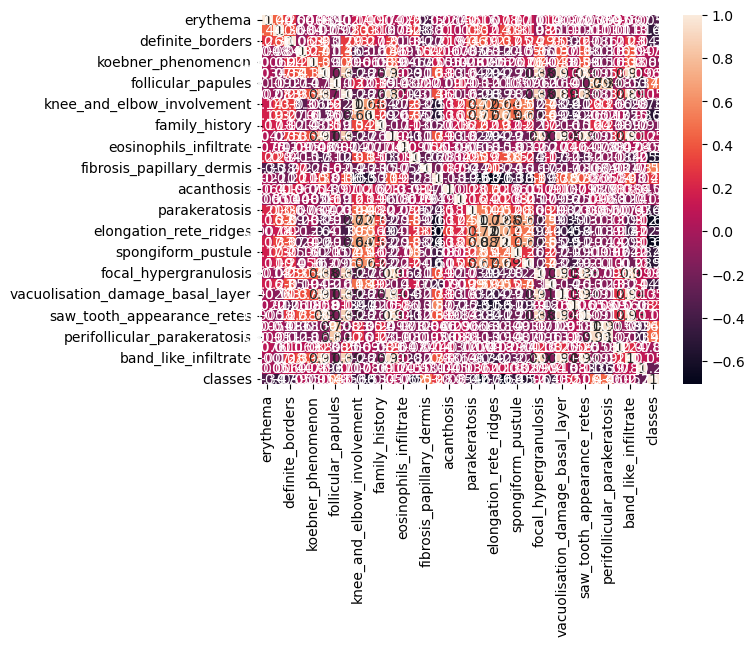

In [10]:
sns.heatmap(data.corr(), annot=True)

In [11]:
data.corr().classes.sort_values(ascending=False)

classes                                1.000000
fibrosis_papillary_dermis              0.526976
follicular_papules                     0.477813
perifollicular_parakeratosis           0.457025
follicular_horn_plug                   0.431972
exocytosis                             0.283433
spongiosis                             0.213401
focal_hypergranulosis                  0.063241
saw_tooth_appearance_retes             0.060444
polygonal_papules                      0.057785
melanin_incontinence                   0.057394
band_like_infiltrate                   0.057266
oral_mucosal_involvement               0.055805
vacuolisation_damage_basal_layer       0.055402
itching                                0.054772
inflammatory_mononuclear_infiltrate   -0.020402
hyperkeratosis                        -0.054428
eosinophils_infiltrate                -0.062323
acanthosis                            -0.079771
koebner_phenomenon                    -0.091323
family_history                        -0

In [12]:
data['classes'].value_counts()

classes
1    112
3     72
2     61
5     52
4     49
6     20
Name: count, dtype: int64

In [13]:
selected_features = [
    'fibrosis_papillary_dermis',
    'follicular_papules',
    'perifollicular_parakeratosis',
    'follicular_horn_plug',
    'exocytosis',
    'spongiosis',
    'thinning_suprapapillary_epidermis',
    'clubbing_rete_ridges',
    'PNL_infiltrate',
    'scalp_involvement',
    'munro_microabcess',
    'scaling',
    'spongiform_pustule',
    'disappearance_granular_layer',
    'parakeratosis',
    'definite_borders',
    'knee_and_elbow_involvement',
    'elongation_rete_ridges',
    'erythema'
]

In [14]:
data_selected = data[selected_features + ['classes']]

In [15]:
data_selected.head()

,fibrosis_papillary_dermis,follicular_papules,perifollicular_parakeratosis,follicular_horn_plug,exocytosis,spongiosis,thinning_suprapapillary_epidermis,clubbing_rete_ridges,PNL_infiltrate,scalp_involvement,munro_microabcess,scaling,spongiform_pustule,disappearance_granular_layer,parakeratosis,definite_borders,knee_and_elbow_involvement,elongation_rete_ridges,erythema,classes
0,0,0,0,0,3,3,0,0,0,0,0,2,0,0,0,0,1,0,2,2
1,0,0,0,0,1,0,2,2,1,1,1,3,2,0,2,3,1,2,3,1
2,0,0,0,0,1,3,0,0,0,0,0,1,0,0,2,2,0,0,2,3
3,0,0,0,0,0,0,2,2,3,2,0,2,2,3,3,2,3,2,2,1
4,0,0,0,0,1,2,0,0,0,0,0,3,0,2,0,2,0,0,2,3


In [16]:
X = data_selected.iloc[:, :-1]
y = data_selected.iloc[:, -1]

In [17]:
y.head()

0    2
1    1
2    3
3    1
4    3
Name: classes, dtype: int64

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)    

In [73]:
print("X-train: ",X_train.shape)
print("X-test: ",X_test.shape)
print("y-train: ",y_train.shape)
print("y-test: ",y_test.shape)

X-train:  (292, 19)
X-test:  (74, 19)
y-train:  (292,)
y-test:  (74,)


In [19]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_predict_lr = model_lr.predict(X_test)
print("Accuracy de LR: ", accuracy_score(y_test, y_predict_lr) * 100, "%")
print("MSE de LR: ", mean_squared_error(y_test, y_predict_lr))  
confusion_matrix(y_test, y_predict_lr)

Accuracy de LR:  89.1891891891892 %
MSE de LR:  0.22972972972972974


array([[24,  0,  0,  0,  0,  0],
       [ 0,  9,  1,  3,  0,  0],
       [ 0,  0, 10,  2,  0,  0],
       [ 0,  0,  2,  8,  0,  0],
       [ 0,  0,  0,  0, 11,  0],
       [ 0,  0,  0,  0,  0,  4]], dtype=int64)

In [76]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)  
y_predict_rf = model_rf.predict(X_test)
print("Accuracy de RF: ", accuracy_score(y_test, y_predict_rf) * 100, "%")
print("MSE de RF: ", mean_squared_error(y_test, y_predict_rf))
confusion_matrix(y_test, y_predict_rf)

Accuracy de RF:  94.5945945945946 %
MSE de RF:  0.13513513513513514


array([[24,  0,  0,  0,  0,  0],
       [ 0, 10,  1,  2,  0,  0],
       [ 0,  0, 11,  1,  0,  0],
       [ 0,  0,  0, 10,  0,  0],
       [ 0,  0,  0,  0, 11,  0],
       [ 0,  0,  0,  0,  0,  4]], dtype=int64)

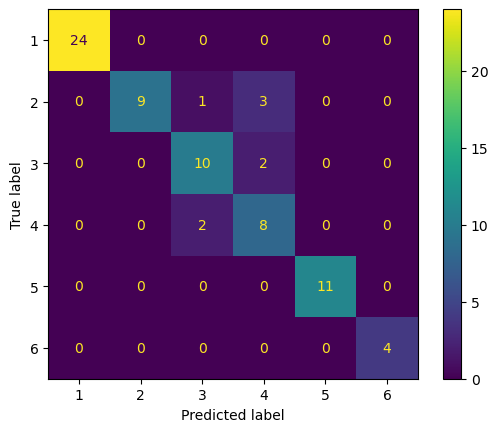

In [20]:
ConfusionMatrixDisplay.from_estimator(model_lr, X_test, y_test)

In [21]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)  
y_predict_rf = model_rf.predict(X_test)
print("Accuracy de RF: ", accuracy_score(y_test, y_predict_rf) * 100, "%")
print("MSE de RF: ", mean_squared_error(y_test, y_predict_rf))
confusion_matrix(y_test, y_predict_rf)

Accuracy de RF:  94.5945945945946 %
MSE de RF:  0.13513513513513514


array([[24,  0,  0,  0,  0,  0],
       [ 0, 10,  1,  2,  0,  0],
       [ 0,  0, 11,  1,  0,  0],
       [ 0,  0,  0, 10,  0,  0],
       [ 0,  0,  0,  0, 11,  0],
       [ 0,  0,  0,  0,  0,  4]], dtype=int64)

In [75]:
X = data_selected.iloc[:, :-1]
y = data_selected.iloc[:, -1]

In [77]:
y.shape

(366,)

In [78]:
y_encoded = to_categorical(y)

In [79]:
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [80]:
# Normalisation des données
scaler = StandardScaler()


# Encodage des classes
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [88]:
X_test.shape

(74, 19)

In [100]:
# Creation du Model
model_snn = Sequential()

In [154]:
# Ajout de la premiere couche
model_snn.add(Dense(64, input_shape=(19,), activation='relu'))

# Couche cachée supplémentaire
#model_snn.add(Dense(32, activation='relu'))  # Tu peux changer le nombre de neurones


# Ajout de la couche de sortie
model_snn.add(Dense(7, activation='sigmoid'))

# Compiler le modele
model_snn.compile(
    optimizer=Adam(learning_rate=0.01),
    loss='binary_crossentropy', 
    metrics=['accuracy'])

# Affichage de l'architecture du reseau de neuron
model_snn.summary()


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_54 (Dense)                │ (None, 64)             │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 1)              │            65 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 7)              │           455 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 7)              │           455 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 7)              │           455 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 7)              │           231 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,844 (46.27 KB)

 Trainable params: 11,844 (46.27 KB)

 Non-trainable params: 0 (0.00 B)

In [155]:
early_stop = EarlyStopping(
    monitor='val_loss',      # Surveille la perte de validation
    patience=10,             # Attends 10 epochs sans amélioration
    restore_best_weights=True # Récupère les meilleurs poids
)


In [156]:
# 3. Entraîner le modèle
# Entrainment du modele
history = model_snn.fit(X_train, y_train_encoded, epochs=100, verbose=1, validation_data=(X_test, y_test_encoded), callbacks=[early_stop])

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.2455 - loss: 0.5948 - val_accuracy: 0.5541 - val_loss: 0.3196
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5639 - loss: 0.2926 - val_accuracy: 0.7703 - val_loss: 0.1638
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7493 - loss: 0.1660 - val_accuracy: 0.7568 - val_loss: 0.1802
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7567 - loss: 0.1333 - val_accuracy: 0.7568 - val_loss: 0.1278
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7640 - loss: 0.1365 - val_accuracy: 0.7297 - val_loss: 0.1916
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7416 - loss: 0.1295 - val_accuracy: 0.7568 - val_loss: 0.1481
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7897 - loss: 0.1219 - val_accuracy: 0.7568 - val_loss: 0.1348
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7948 - loss: 0.1352 - val_accuracy: 0.

In [157]:

# 4. Évaluer le modèle
# Affichage de l'entrainement
epoch_accuracy = history.history['accuracy']
epoch_loss = history.history['loss']

epoch_val_accuracy = history.history['val_accuracy']
epoch_val_loss = history.history['val_loss']

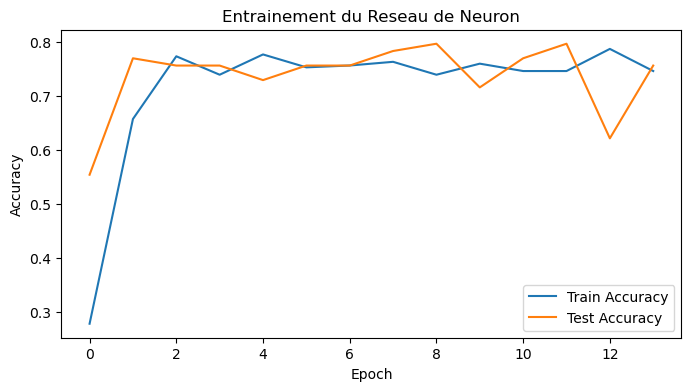

In [158]:
plt.figure(figsize=(8, 4))
plt.plot(range(0, len(epoch_accuracy)), epoch_accuracy, label='Train Accuracy')
plt.plot(range(0, len(epoch_val_accuracy)), epoch_val_accuracy, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Entrainement du Reseau de Neuron')
plt.legend()
plt.show()

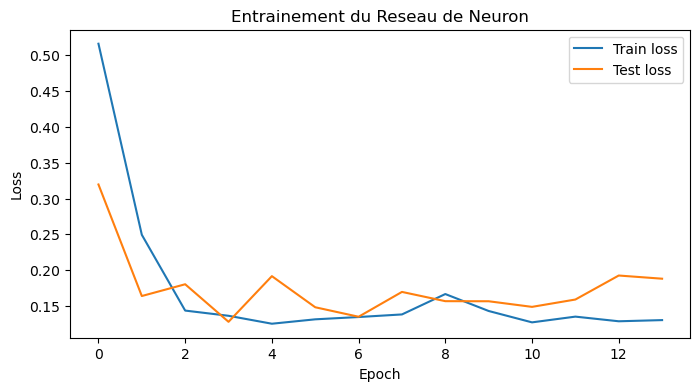

In [159]:
plt.figure(figsize=(8, 4))
plt.plot(range(0, len(epoch_loss)), epoch_loss, label='Train loss')
plt.plot(range(0, len(epoch_val_loss)), epoch_val_loss, label='Test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Entrainement du Reseau de Neuron')
plt.legend()
plt.show()

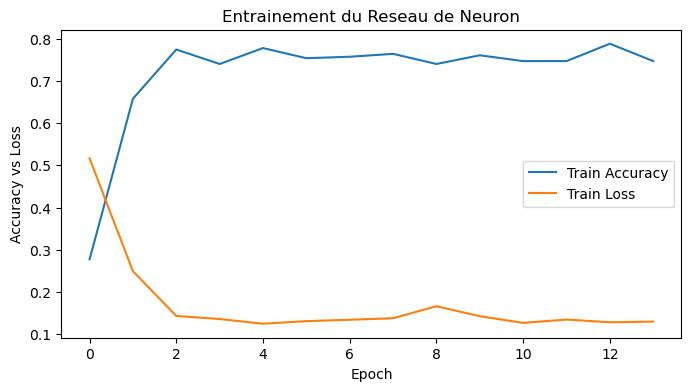

In [160]:
plt.figure(figsize=(8, 4))
plt.plot(range(0, len(epoch_accuracy)), epoch_accuracy, label='Train Accuracy')
plt.plot(range(0, len(epoch_loss)), epoch_loss, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy vs Loss')
plt.title('Entrainement du Reseau de Neuron')
plt.legend()
plt.show()

In [129]:
# Evaluer
model_snn.evaluate(X_test, y_test_encoded)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8369 - loss: 0.0954


[0.10070216655731201, 0.837837815284729]